## Euler Method

__CYBR 304 & MATH 420__ <br>
_Spring 2024_ <br>

To solve the differential equation (DE) given as $\frac{\mathrm{d} y}{\mathrm{d} t} = F(t,y)$, we integrate this equation with respect to $t$ from $t_0$ to $t_1$. Since we are mathematicians, what we do to the right, we do to the left (side of the equation); thus
\begin{equation}
     \int_{t_0}^{t_1} \frac{\mathrm{d} y}{ \mathrm{d} t} \,\mathrm{d} t  =  \int_{t_0}^{t_1} F(t,y) \, \mathrm{d} t.
\end{equation} 
But we have to be aware that in the integrand on the right side that $y$ actually depends on $t$.  So maybe we should write the dependence of $y$ on $t$ explicitly. Thus
\begin{equation}
     \int_{t_0}^{t_1} \frac{\mathrm{d} y}{ \mathrm{d} t} \mathrm{d} t  = 
     \int_{t_0}^{t_1} F(t,y(t))\mathrm{d} t.
\end{equation} 
The left side is the integral of a derivative, so the fundamental theorem of calculus gives
\begin{equation}
     y(t_1) - y(t_0)  = \int_{t_0}^{t_1} F(t,y(t))\mathrm{d} t.
\end{equation} 
This result is exact--we haven't yet made an approximation. Our approximation is to replace the integral on the right side with a left point rule integration. Thus,
\begin{equation}
     y(t_1) - y(t_0)  \approx (t_1 - t_0) F(t_0,y_0).
\end{equation} 
Remember that the left point rule is width times value of the integrand at the lower limit of integration.  Solving for $y(t_1)$ yields
\begin{equation}
     y(t_1) \approx  y(t_0) + (t_1 - t_0) F(t_0,y_0).
\end{equation} 
If $t_0$ and $y(t_0)$ are known, this result allows us to find an approximate value of $y(t_1)$.  And of course once we know the approximate value of $y(t_1)$, we can find the approximate value of $y(t_2)$ using
\begin{equation}
     y(t_2) \approx  y(t_1) + (t_2 - t_1) F(t_1, y(t_1)).
\end{equation}
Continuing like this, we have
\begin{equation}
     y(t_{k+1}) \approx  y(t_k) + (t_{k+1} - t_k) F(t_k,y_k).
\end{equation}
Usually, we choose $t_{k+1} - t_k$ to be a constant, say $h$.  This gives
\begin{align}
     y(t_{k+1}) &\approx  y(t_k) +  h F(t_k,y(t_k)), \\
              t_{k+1} &= h + t_k.
\end{align}
Finally, we usually define $y(t_k) = y_k$.  Doing so gives
\begin{align}
     y_{k+1}  &\approx  y_k  +  h F(t_k,y_k), \\
              t_{k+1} &= h + t_k.
\end{align}
This is the famous _Euler method._ 

In the movie _Hidden Figures,_ Katherine Johnston suggested using the Euler Method to calculate the re-entry of the John Glenn's space capsule from Earth orbit.
I have read NASA technical reports that indicate that this part of the movie is historically accurate. 

If you have not yet seen _Hidden Figures,_ it's wonderful. I've seen it three times and would enjoy seeing it a fourth.

The  Julia function `zeros` declares an array of a given type and fills it with zero.

In [2]:
"""
    euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)

Approximates the solution of the initial value problem dy/dt = f(t,y), y|_{t=t0} = y_0 using the Euler method.

### Arguments
- `f::Function`: The function defining the first-order ODE dy/dt = f(t, y).
- `t0::Number`: The initial value of the independent variable.
- `y0::Number`: The initial value of the dependent variable.
- `t1::Number`: The final value of the indepenent variable.
- `N::Integer`: The number of steps to take.

### Returns

Return the two tuple ta, ya, where
- `ta::Vector{<:Number}`: A vector of the values of the dependent variable.
- `ya::Vector{<:Number}`: A vector of corresponding approximated values of the dependent variable.

### Errors

- Throw an argument error when `N < 0`.

### Details

See https://en.wikipedia.org/wiki/Euler_method
"""
function euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)
    N < 0 && throw(ArgumentError("N must be non-negative"))
    ya = zeros(typeof(t0), N+1)
    h = (t1 - t0) / N # step size
    ta = [t0 + h*k for k in 0:N] # use constant step size & allocate entire array
    ya[1] = y0
    for k in 2:N+1
       ya[k] = fma(h, f(ta[k-1], ya[k-1]), ya[k-1]) # use fma for maybe gain a tiny gain in accuracy
    end
    ta, ya
end

euler_method

In [3]:
? euler_method

search: euler_method



```
euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)
```

Approximates the solution of the initial value problem dy/dt = f(t,y), y|*{t=t0} = y*0 using the Euler method.

### Arguments

  * `f::Function`: The function defining the first-order ODE dy/dt = f(t, y).
  * `t0::Number`: The initial value of the independent variable.
  * `y0::Number`: The initial value of the dependent variable.
  * `t1::Number`: The final value of the indepenent variable.
  * `N::Integer`: The number of steps to take.

### Returns

Return the two tuple ta, ya, where

  * `ta::Vector{<:Number}`: A vector of the values of the dependent variable.
  * `ya::Vector{<:Number}`: A vector of corresponding approximated values of the dependent variable.

### Errors

  * Throw an argument error when `N < 0`.

### Details

See https://en.wikipedia.org/wiki/Euler_method


The first argument to `euler_method` is a function of two variables. Let's give our code an easy test; our DE is
$$
   \frac{\mathrm{d} y}{ \mathrm{d} t}  = 1, \quad y = 1.5 \mbox{  when } t = 0
$$
We'll solve this DE (actually it's an initial value problem (IVP) because we have given one point on the solution curve) on the interval $[0,2]$ using 10 steps.  The solution to the IVP is
$$
    y(t) = \frac{3}{2} + t.
$$

In [5]:
X, Y = euler_method((t,y) -> 1, 0.0, 1.5, 2.0, 10);

Let's look at this graphically.  We can also graph the exact solution by mapping $t \mapsto 1.5 + t$ on to the array X. Finally using Gadfly's layer function, we can plot both graphs and use points for the approximate solution and a curve for the exact solution.

In [7]:
using Gadfly

In [8]:
YY =  map(t -> 1.5+t,X);

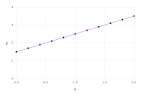

In [9]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> 1.5+t,X), Geom.line,color=[colorant"darkorchid1"]))

For this DE, the Euler method appears to be exact.  This isn't a huge surprise--the DE is $\frac{\mathrm{d} y}{\mathrm{d} t} = 1 $. Using the left point rule to integrate the DE we have
$$
   \int_{t_k}^{t_{k+1}} \frac{\mathrm{d} y}{\mathrm{d} t} =  \int_{t_k}^{t_{k+1}}  \mathrm{d} t.  
$$
But we know that the left point rule is exact for a constant function.  That makes the Euler method exact for this IVP.

Let's try the IVP
\begin{equation}
     \frac{\mathrm{d} y}{ \mathrm{d} t}  = \sqrt{1 - y^2}, \quad y=0 \mbox{  when } t =0.
    \end{equation} 
The exact solution on the interval for $t \in [-\pi/2, \pi/2]$ is $y = \sin(t)$. But using a final time of $\pi/2$ gives a domain error for the square root.  

Backing down to a final time of  $0.9 \pi/2$ we get a solution.

In [12]:
X, Y = euler_method((t,y) -> sqrt(1-y^2), 0.0, 0.0, 0.92 * pi/2, 24);

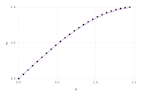

In [13]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> sin(t),X), Geom.line,color=[colorant"darkorchid1"]))

Unlike our first example, this method isn't exact. Let's try the Euler method on the IVP
$$
     \frac{\mathrm{d} y}{ \mathrm{d} t}  = y, \quad y=1 \mbox{  when } t =0.   
$$
The exact solution is $y = \mathrm{e}^t$.  Let's try solving on the interval $[0,10]$ using 25 steps. Looks like the solution doesn't grow quite fast enough.

In [15]:
X, Y = euler_method((t,y) -> y, 0.0, 1.0, 10, 25);

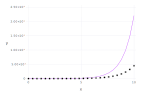

In [16]:
plot(layer(x=X, y=Y,color=[colorant"black"]), layer(x = X, y=map(t -> exp(t),X), Geom.line,color=[colorant"darkorchid1"]))

Increasing the number of steps to 1000, we see the approximate solution is more accurate.

In [18]:
X, Y = euler_method((t,y) -> y, 0.0, 1.0, 10, 1000);

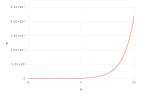

In [19]:
plot(layer(x=X, y=Y,Geom.line, color=[colorant"orange"]), layer(x = X, y=map(t -> exp(t),X), Geom.line,color=[colorant"darkorchid1"]))

Here is a plot of the relative error--it looks linear

In [21]:
E = [100*abs((Y[k] - exp((k-1)/100))/exp((k-1)/100)) for k = 1:1001];

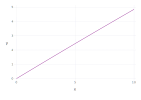

In [22]:
plot(x = X, y = E, Geom.line, color=[colorant"purple"])

Let's try the IVP $\frac{\mathrm{d} y}{\mathrm{d} t} = - 8 y$ and $y(0) = 1$ on the interval $[0,10]$. The
true solution is $ y = \exp(-8 t)$.  Try 25 steps.  That makes the step size $0.4$

Yikes! I'm glad we're not attempting to bring John Glenn home from outer space! The Euler solution goes bonkers!

In [24]:
X, Y = euler_method((t,y) -> -8*y, 0.0, 1.0, 10, 25);

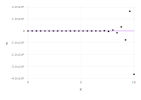

In [25]:
plot(layer(x=X, y=Y,Geom.point, color=[colorant"black"]), layer(t -> exp(-8*t),0,10,color=[colorant"darkorchid1"]))

The stability condition for the Euler method for $\frac{\mathrm{d} y}{\mathrm{d} t} = \mu y$ is $-2 < h \mu < 0$. Specifically,
when $\mu=-8$, the stability condition is $0 < h < \frac{1}{4}$. So using a step size of $0.4$ is unstable. Let's reduce the step size
to a modest $\frac{1}{8}$. For the interval $[0,10]$, we'll choose $N = 80$. The Euler solution isn't particularly accurate, but at least
it doesn't go bonkers!

In [27]:
X, Y = euler_method((t,y) -> -8*y, 0.0, 1.0, 10, 80);

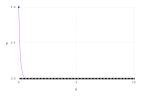

In [28]:
plot(layer(x=X, y=Y,Geom.point, color=[colorant"black"]), layer(t -> exp(-8*t),0,10,color=[colorant"darkorchid1"]))

Here is a fun (for me) example. We'll solve the IVP
$$
   \frac{\mathrm{d} y}{\mathrm{d} t} = \sqrt{1 - y^4}, \quad y(0) = 0.
$$
There is a name for this function: it's a Jacobian elliptic function. And, of course, Julia has a package for that

In [30]:
using Elliptic

When the solution gets close to $1$, we run the risk that we'll get a domain error from the square root function. But in reality, the solution extends to the entire real line. The function wiggles and is periodic much like the sine function:

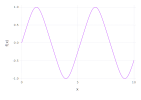

In [32]:
plot(t -> Jacobi.sn(t,-1), 0.0, 10.0,color=[colorant"darkorchid1"])

In [33]:
X, Y = euler_method((t,y) -> sqrt(1-y^4), 0.0, 0.0, 1.25, 16);

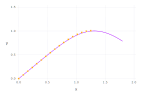

In [34]:
plot(layer(x=X,y=Y,Geom.point,color=[colorant"orange"]), layer(t -> Jacobi.sn(t,-1), 0.0, 1.8, Geom.line,color=[colorant"darkorchid1"]))

Suppose you wanted to use a numerical DE solver to calculate the positions of all the planets in our solar system one billion years from now. Among your _many_ challenges would be the accumulation of rounding error. For the Euler method, a rounding error in $y_k$ is compounded into the calculation of $y_{k+1}$. Rounding errors aren't entirely random, so they don't entirely cancel, but they tend to accumulate and grow larger in magnitude.

The _compensated sum_ method is one way to reduce this compounding of errors. All non-terrible numerical DE solvers should use such methods to reduce the accumulation of rounding errors.  For a detailed discussion of using these methods for DE solvers, see _Accuracy and Stability of Numerical Algorithms_, by Nicholas J. Higham

Here is one implemenation

In [36]:
function two_sum(a::Real, b::Real)
    s = a + b
    bb = s - a
    aa = s - bb
    s, (a - aa) + (b - bb)
end

two_sum (generic function with 1 method)

Any example of `two_sum`.  This function returns a tuple of the sum of its arguments and the error in the sum

In [38]:
two_sum(2.3, 2.6)

(4.9, -4.440892098500626e-16)

In [39]:
two_sum(0.25,0.5)

(0.75, 0.0)

In [40]:
function euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)
    N < 0 && throw(ArgumentError("N must be non-negative"))
    ya = zeros(typeof(t0), N+1)
    h = (t1 - t0) / N # step size
    ta = [t0 + h*k for k in 0:N] # use constant step size & allocate entire array
    ya[1] = y0
    c = zero(y0) # Initialize compensation variable
    for k in 2:N+1
        y_temp = fma(h, f(ta[k-1], ya[k-1]), c)
        (ya[k], c) = two_sum(ya[k-1], y_temp)
    end
    ta, ya
end

euler_method (generic function with 1 method)

In [41]:
X, Y = euler_method((t,y) -> sqrt(1-y^4), 0.0, 0.0, 1.25, 16);

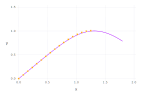

In [42]:
plot(layer(x=X,y=Y,Geom.point,color=[colorant"orange"]), layer(t -> Jacobi.sn(t,-1), 0.0, 1.8, Geom.line,color=[colorant"darkorchid1"]))